In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import time
from dds_loopback import DDSOverlay

In [25]:
ol = DDSOverlay(bitfile_name='hw/top.bit',dbg=False,plot=False,n_buffers=1,download=True)

In [38]:
def sfdr_dBc(buffer):
    fft = abs(np.fft.rfft(ol.dma_buffers[0]))
    peaks = sorted(fft[1:-1], reverse=True)[:2]
    return 20*np.log10(peaks[0]/peaks[1])

In [69]:
ol.set_freq_hz(200e6)
ol.set_vga_atten_dB(18)
ol.set_dac_atten_dB(12)
time.sleep(0.1)
ol.capture_data(ol.dma_buffers[0], N_samp=32, OSR=1024)

In [61]:
ol.set_freq_hz(200e6)
sfdr = np.zeros((33,11))
vga_atten_settings = np.linspace(0,32,33)
dac_atten_settings = np.linspace(0,60,11)
for v,vga_atten in enumerate(vga_atten_settings):
    ol.set_vga_atten_dB(vga_atten)
    time.sleep(0.1)
    for d,dac_atten in enumerate(dac_atten_settings):
        ol.set_dac_atten_dB(dac_atten)
        ol.capture_data(ol.dma_buffers[0], N_samp=32, OSR=1024)
        sfdr[v,d] = sfdr_dBc(ol.dma_buffers[0])
        print(f'for vga_atten = {vga_atten}, dac_atten = {dac_atten}, got SFDR = {sfdr[v,d]}')

for vga_atten = 0.0, dac_atten = 0.0, got SFDR = 0.09917957101003388
for vga_atten = 0.0, dac_atten = 6.0, got SFDR = 2.643216116750016
for vga_atten = 0.0, dac_atten = 12.0, got SFDR = 1.693240223354362
for vga_atten = 0.0, dac_atten = 18.0, got SFDR = 0.0272355073530385
for vga_atten = 0.0, dac_atten = 24.0, got SFDR = 20.241693173700412
for vga_atten = 0.0, dac_atten = 30.0, got SFDR = 42.13854723991784
for vga_atten = 0.0, dac_atten = 36.0, got SFDR = 39.004805645636985
for vga_atten = 0.0, dac_atten = 42.0, got SFDR = 34.10000836106603
for vga_atten = 0.0, dac_atten = 48.0, got SFDR = 26.6116933028175
for vga_atten = 0.0, dac_atten = 54.0, got SFDR = 15.708048883779977
for vga_atten = 0.0, dac_atten = 60.0, got SFDR = 14.512863403118255
for vga_atten = 1.0, dac_atten = 0.0, got SFDR = 0.04717180199721892
for vga_atten = 1.0, dac_atten = 6.0, got SFDR = 1.6884686680143566
for vga_atten = 1.0, dac_atten = 12.0, got SFDR = 1.9696606040361675
for vga_atten = 1.0, dac_atten = 18.0, got

In [62]:
scipy.io.savemat('data/afe_loopback_dac_sfdr_200MHz.mat', {'vga_atten': vga_atten_settings, 'dac_atten': dac_atten_settings, 'sfdr': sfdr, 'freq': 1.4e9})

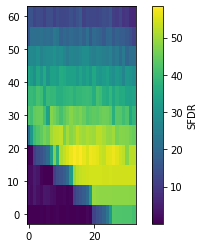

In [64]:
#plt.imshow(sfdr, interpolation=None, origin='lower', extent=[-3, 63, 0, 32])
v,d = np.meshgrid(vga_atten_settings, dac_atten_settings)
plt.pcolor(v, d, np.transpose(sfdr))
cb=plt.colorbar()
cb.set_label('SFDR')
plt.gca().set_aspect('equal')

In [9]:
fft = 20*np.log10(abs(np.fft.rfft(ol.dma_buffers[0])))-20*np.log10(ol.dma_frame_size*(2**16))

/tmp/ipykernel_14742/727962273.py:1: RuntimeWarning: divide by zero encountered in log10
  fft = 20*np.log10(abs(np.fft.rfft(ol.dma_buffers[0])))-20*np.log10(ol.dma_frame_size*(2**16))


[-16.40515782785033, -70.44843818849344, -77.62056364436879, -80.41805609285512, -81.77268740752604]
54.04328036064311


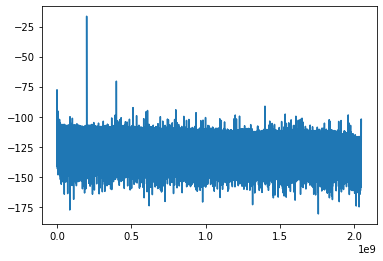

In [70]:
fft = 20*np.log10(abs(np.fft.rfft(ol.dma_buffers[0])))-20*np.log10(ol.dma_frame_size*(2**16))
fvec = np.linspace(0,ol.f_samp/2,ol.dma_frame_size//2+1,endpoint=True)
plt.plot(fvec[1:-1],fft[1:-1])
#plt.xlim([2.048e9-2e6, 2.048e9+2e6])
peaks = sorted(fft[1:-1], reverse=True)[:5]
print(peaks)
print(peaks[0] - peaks[1])

In [3]:
vga_setting = 0
for scale in [0, 6, 12, 30, 60]:
    ol.do_freq_sweep(f"data/afe_loopback_dac_{scale}dB_vga_{vga_setting}dB.mat", scale, np.logspace(4, 9.25, 200))

setting cos_scale to 0 (0dB attenuation)
setting pinc to 40 (1.000e+04Hz)
transferred 4.0MiB in 110us (19.086GS/s)
setting pinc to 43 (1.063e+04Hz)
transferred 4.0MiB in 90us (23.265GS/s)
setting pinc to 46 (1.129e+04Hz)
transferred 4.0MiB in 82us (25.591GS/s)
setting pinc to 49 (1.200e+04Hz)
transferred 4.0MiB in 81us (25.749GS/s)
setting pinc to 52 (1.275e+04Hz)
transferred 4.0MiB in 81us (25.818GS/s)
setting pinc to 55 (1.355e+04Hz)
transferred 4.0MiB in 82us (25.596GS/s)
setting pinc to 58 (1.440e+04Hz)
transferred 4.0MiB in 81us (25.833GS/s)
setting pinc to 62 (1.530e+04Hz)
transferred 4.0MiB in 82us (25.73GS/s)
setting pinc to 66 (1.626e+04Hz)
transferred 4.0MiB in 81us (25.884GS/s)
setting pinc to 70 (1.728e+04Hz)
transferred 4.0MiB in 82us (25.61GS/s)
setting pinc to 75 (1.836e+04Hz)
transferred 4.0MiB in 84us (24.978GS/s)
setting pinc to 79 (1.951e+04Hz)
transferred 4.0MiB in 82us (25.492GS/s)
setting pinc to 84 (2.073e+04Hz)
transferred 4.0MiB in 82us (25.612GS/s)
setting pin